In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [4]:
df =pd.read_csv('../datasets/fifa_eda.csv')

In [5]:
nan=df['International Reputation'].isnull()

In [6]:
data=df[nan]

In [7]:
df=df.dropna()

In [8]:
X=df[['Age','Potential','Overall','Skill Moves','Height','Weight']]

In [35]:
X

,Age,Potential,Overall,Skill Moves,Height,Weight
0,31,94,94,4.0,5.583333,159.0
1,33,94,94,5.0,6.166667,183.0
2,26,93,92,5.0,5.750000,150.0
3,27,93,91,1.0,6.333333,168.0
4,27,92,91,4.0,5.916667,154.0
...,...,...,...,...,...,...
18202,19,65,47,2.0,5.750000,134.0
18203,19,63,47,2.0,6.250000,170.0
18204,16,67,47,2.0,5.666667,148.0
18205,17,66,47,2.0,5.833333,154.0


In [9]:
Y=df['International Reputation']

In [10]:
pipeline=Pipeline([('scale',StandardScaler()),('model',KNeighborsClassifier(algorithm='auto'))])

In [11]:
xtr,xte,ytr,yte=train_test_split(X,Y,train_size=0.33,random_state=42)

In [12]:
pipeline.fit(xtr,ytr)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [13]:
yp=pipeline.predict(xte)

In [14]:
accuracy_score(yp,yte)

0.920570095015836

In [15]:
print(confusion_matrix(yp,yte))

[[10726   540    44     2     0]
 [  195   241    77    11     1]
 [    8    48    75    24     2]
 [    0     0     1     3     0]
 [    0     0     0     0     0]]


In [16]:
print(classification_report(yp,yte))

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96     11312
         2.0       0.29      0.46      0.36       525
         3.0       0.38      0.48      0.42       157
         4.0       0.07      0.75      0.14         4
         5.0       0.00      0.00      0.00         0

    accuracy                           0.92     11998
   macro avg       0.35      0.53      0.38     11998
weighted avg       0.94      0.92      0.93     11998



c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [17]:
#hyper parameter tunning

params = {
    'model__n_neighbors': list(range(3, 16)),   
    'model__weights': ['uniform', 'distance'],   
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__metric': ['euclidean', 'manhattan','minkowski']  
}

In [18]:
cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

In [19]:
cv.fit(xtr, ytr)

c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'model__metric': ['euclidean', 'manhattan',
                                           'minkowski'],
                         'model__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                                13, 14, 15],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [20]:
print('Best Parameters:', cv.best_params_)
print('Best Score:', cv.best_score_)

Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'manhattan', 'model__n_neighbors': 13, 'model__weights': 'distance'}
Best Score: 0.9280755217623655


In [21]:
best_model=cv.best_estimator_

In [22]:
byp=best_model.predict(xte)

In [23]:
accuracy_score(byp,yte)

0.9225704284047341

In [63]:
xte.iloc[:500,2]

12240    63
10894    65
17661    53
2481     74
12146    63
         ..
5067     70
2603     74
12263    63
18068    50
6118     69
Name: Overall, Length: 500, dtype: int64

<Axes: xlabel='Potential', ylabel='Overall'>

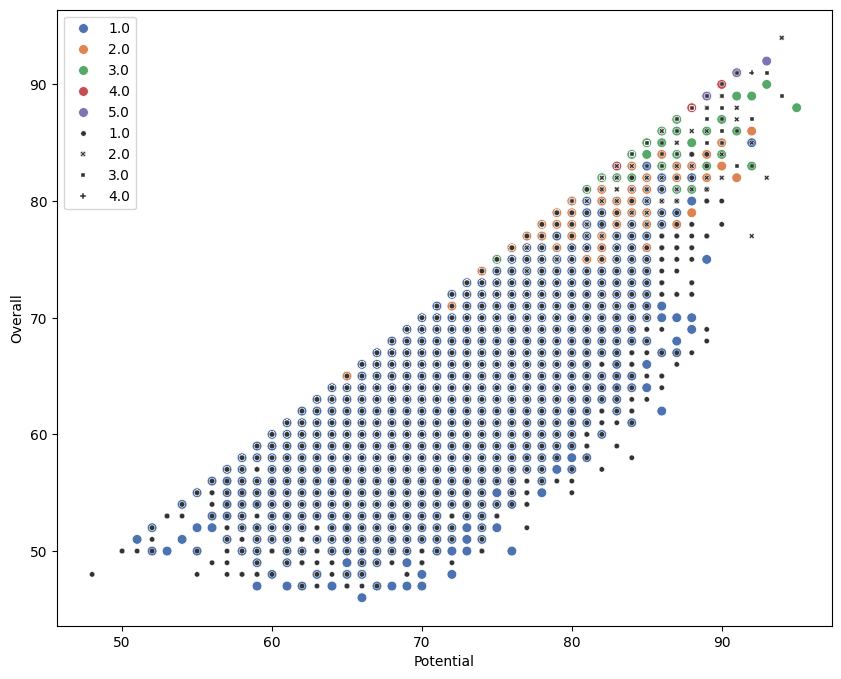

In [91]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=xtr.iloc[:, 1], 
                y=xtr.iloc[:, 2], 
                hue=ytr,
                palette='deep',
                s=50)
sns.scatterplot(x=xte.iloc[:, 1], 
                y=xte.iloc[:, 2], 
                style=yp,
                color=".2",
                s=15)

<Axes: >

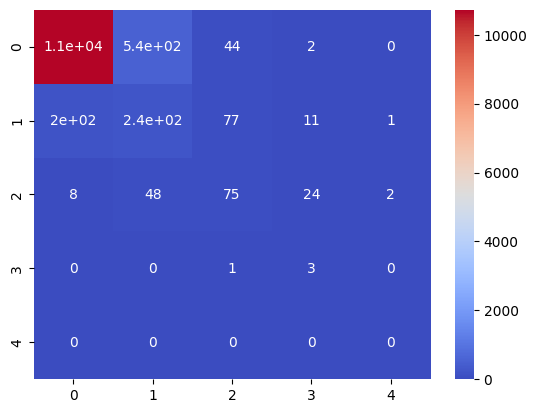

In [93]:
sns.heatmap(confusion_matrix(yp,yte),annot=True,cmap='coolwarm')